In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FLP
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

reload


In [3]:
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-08-18_18-46-19_'
# flp = FLP.FlexLogPol(path,concat=True)
# self = FLP.FlexLogPol(path,concat=False)
self = FLP.FlexLogPol(
    path,
#     concat=True,
    concat=False,
    get_clusters=False,
    open_merged=True,
    clusters_avail=False
)

'using vol for conc'


In [811]:
self.reset_z_levels()

'using vol for conc'


In [812]:
dsF= self.filter_hours_with_few_mea()

In [926]:
dsSM = ds1 = FLP.smooth_merged_ds(
    dsF
    )

(3888, 6, 35, 36)
(3888, 6, 35, 36)
(3888, 6, 35, 36)
(3888, 6, 35, 36)


(-25, -7)

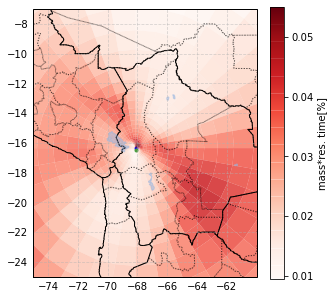

In [927]:
cl = co.CPer
c1 =ds1[cl].sum([co.RL,co.ZM])
c2 = ds1[cl].sum([co.ZM,co.RL,co.TH_CENTER])
ar = c1/c2
# ar = c1
ar = ar.isel(**{co.R_CENTER:slice(0,-3)})
ax = fa.get_ax_bolivia(fig_args={'figsize':(5,5)})
fa.logpolar_plot(ar,name=co.CPer,ax=ax,perM=.95,perm=.01)
ax.set_xlim(-75,-60)
ax.set_ylim(-25,-7)
# ax = fa.get_ax_lapaz()
# fa.logpolar_plot(ar,name=co.CPer,ax=ax,perM=.95)

In [928]:
ax.figure.savefig('/tmp/map.pdf')

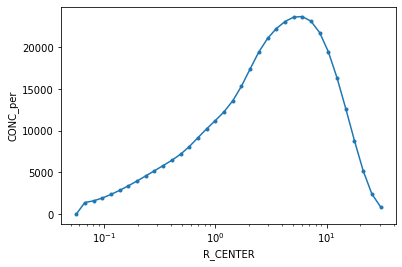

In [929]:
ds1.sum([co.ZM,co.RL,co.TH_CENTER])[co.CPer].plot(marker='.',xscale='log')

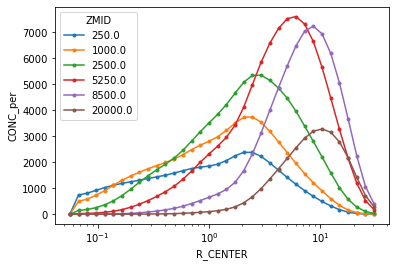

In [930]:
lines = ds1.sum([co.RL,co.TH_CENTER])[co.CPer].plot(marker='.',xscale='log',hue=co.ZM)

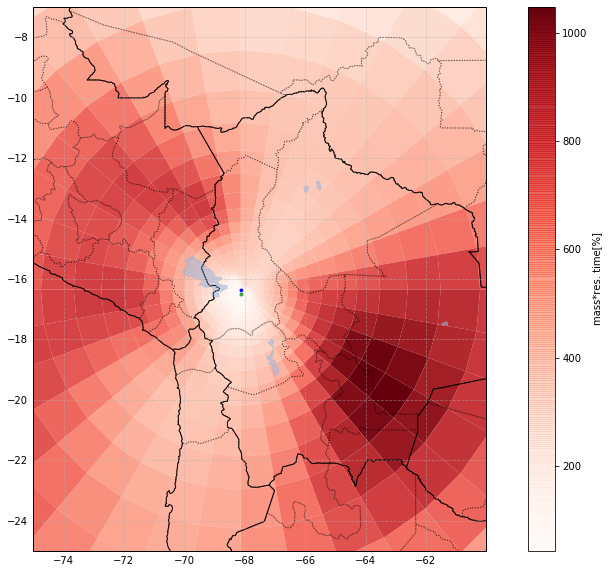

In [931]:
cl = co.CPer
c1 =ds1[cl].sum([co.RL,co.ZM])
c2 = ds1[cl].sum([co.ZM,co.RL,co.TH_CENTER])
ar = c1/c2
ar = c1
ar = ar.isel(**{co.R_CENTER:slice(0,-3)})
ax = fa.get_ax_bolivia()
fa.logpolar_plot(ar,name=co.CPer,ax=ax,perM=.999,perm=.1)
ax.set_xlim(-75,-60)
yl=ax.set_ylim(-25,-7)
# ax = fa.get_ax_lapaz()
# fa.logpolar_plot(ar,name=co.CPer,ax=ax,perM=.95)

In [932]:
ax.figure.savefig('/tmp/gen_fig.pdf')

# new part

In [933]:
dsZ = dsSM

In [934]:
dfcc = self.get_vector_df_for_clustering(self.coarsen_par,ar=dsZ[co.CONC])

In [935]:
nc = 21

In [936]:
dfres = self.python_cluster(
    random_state=222,
    n_cluster=nc,
    df=dfcc,
    return_df=True,
    
)

In [937]:
dsZ[co.ClusFlag]=dfres[co.ClusFlag].to_xarray()

In [938]:
dg = dsZ.assign_coords(**{co.ClusFlag:dsZ[co.ClusFlag],co.TOPO:dsZ[co.TOPO]})
dg = dg.groupby(co.ClusFlag)
dg = dg.sum('stacked_R_CENTER_TH_CENTER_ZMID')

In [939]:
df = dg.to_dataframe()

In [940]:
df1 = df[co.CPer]

In [941]:
df2 = df1.unstack(co.ClusFlag)

In [942]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [943]:
FLP.COLORS = [*FLP.COLORS,*FLP.COLORS]

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/pandas/plotting/_tools.py:203: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/pandas/plotting/_core.py:1801: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


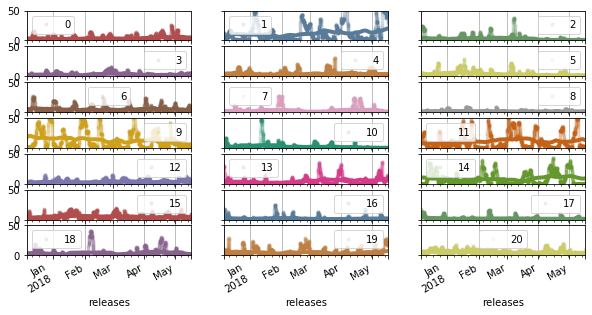

In [1061]:
set_matplotlib_formats('png')
axs = df2.plot(subplots=True,sharex=True,sharey=True,color = FLP.COLORS,
              figsize=(10,5),layout=(int(np.ceil(nc/3)),3),grid=True,marker='.',linewidth=0,alpha=.1,
              legend=True)
df3= df2.rolling(45*24,center=True,min_periods=1,win_type='gaussian').mean(std=45*24)
axs = df3.plot(
    subplots=True,sharex=True,sharey=True,layout=(int(np.ceil(nc/3)), 3),color = FLP.COLORS,
    ylim = (0,50),grid=True,figsize=(10,5),linewidth=4,ax =axs.flatten()[:nc],
    legend=False
              )

In [1062]:
axs[0].figure.savefig('/tmp/inf.pdf')

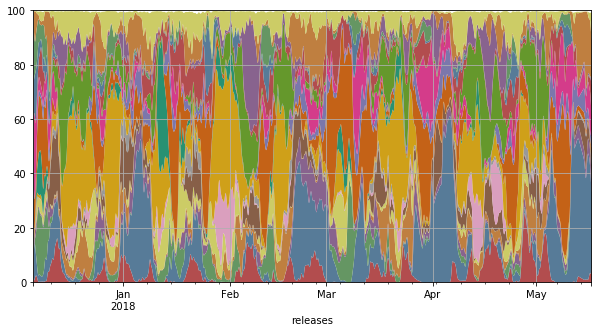

In [946]:
axs = df2.plot.area(
    subplots=False,
    layout=(int(np.ceil(nc/3)), 3),color = FLP.COLORS,
    ylim = (0,100),grid=True,figsize=(10,5),linewidth=0,
    legend=False
              )

# dd = df[bc]['2017-12':'2018-05']*10

# dd.plot(
#     marker=',',linewidth=0,
#     figsize=(10,5),
#     color='k'
# )
# std=24
# res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
# ax=res.plot(figsize=(20,10),color='k',linewidth=2)
# # ax.set_ylim(.1,8)
# # ax.set_yscale('log')
# std=24*30
# res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
# ax=res.plot(figsize=(10,5),color='k',linewidth=2)
# # ax.set_ylim(.1,8)
# # ax.set_yscale('log')

In [947]:
axs.figure.savefig('/tmp/inf_area.pdf')

In [948]:
# top = np.asscalar(
#     (dsZ[co.CPer]/c2).quantile(.9999)
# )
# c2 = dsSM[co.CPer].sum([co.ZM,co.RL,co.TH_CENTER])
# for ii in range(1):
#     ax = fa.get_ax_bolivia(
#         fig_args={'figsize':(5,5)})
#     for i in range(nc):
#         cmap = fa.get_custom_cmap(self.colors[i])
#         ds1 = dsZ[co.CPer].where(dsZ[co.ClusFlag]==i)
#         ds1 = ds1.isel(**{co.ZM:ii})
#         ds2 = ds1.sum(co.RL)
#         ex = ds2.sum().values > 0
#         if ex:
#             fa.logpolar_plot(
#                 ds2,name=co.CPer,ax=ax,perM=.99,perm=0,quantile=True,colorbar=False,
#                 patch_args={'cmap':cmap}
#             )
#     ax.set_xlim(-75,-60)
#     ax.set_title(ii)
#     yl=ax.set_ylim(-25,-7)

In [949]:
ax.figure.savefig('/tmp/clus_res.pdf')

In [950]:
ii=5
ds_fl = dsZ[co.CPer].where(dsZ[co.ClusFlag]==ii)

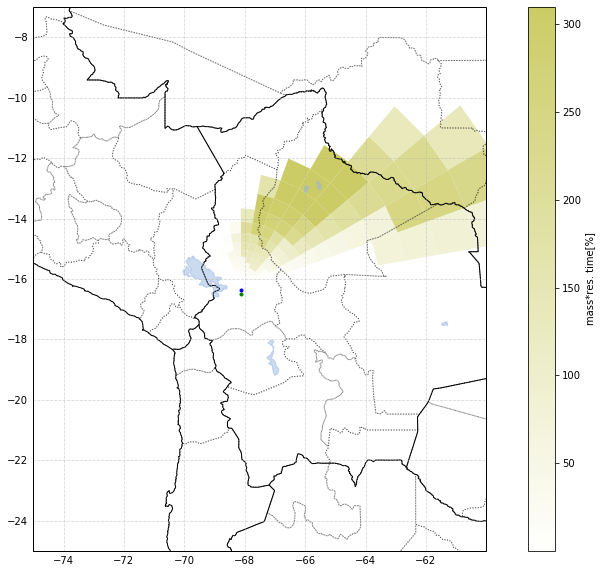

In [951]:
ax = fa.get_ax_bolivia()
cmap = fa.get_custom_cmap(self.colors[ii])
fa.logpolar_plot(ds_fl.sum([co.RL,co.ZM]),
                 name=co.CPer,ax=ax,
                 patch_args={'cmap':cmap}
                )
ax.set_xlim(-75,-60)
yl=ax.set_ylim(-25,-7)

In [952]:
import simplekml

In [953]:
import simplekml
kml = simplekml.Kml()

In [954]:
dsZ1 = dsZ.assign_coords(**{
    co.ClusFlag:dsZ[co.ClusFlag],
    co.TOPO:dsZ[co.TOPO].mean([co.RL,co.ZM])
})

In [955]:
dsM = dsZ1.mean(co.RL)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [956]:
dmm=dsM[co.CPer].mean([co.TH_CENTER,co.ZM])
dmmm = dmm.mean()
dsM1 = dsM.copy()
dsM1[co.CPer] = dsM[co.CPer]/(dmm+(.05*dmmm))

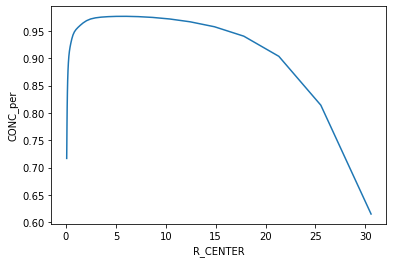

In [957]:
dmm1=dsM1[co.CPer].mean([co.TH_CENTER,co.ZM])
dmm1.plot()
# (30*dmm).plot(ylim=(0,1))

In [958]:
drop_coor_list = [co.LON,co.LAT,co.ZB,co.ZLM,co.ZT,co.VOL,co.GA]

In [959]:
dfM = dsM1.drop(drop_coor_list)[co.CPer].to_dataframe().reset_index()

In [960]:
r = dfM.iloc[100]
kml = simplekml.Kml()
sr =dfM[co.CPer]
max_col=sr[sr>0].quantile(.95)
low_thr=sr[sr>0].quantile(.4)

In [961]:
max_col,low_thr

(2.6622503635307733, 0.4390980961594004)

In [1025]:
def polygon_from_row(r,kml:simplekml.Kml, max_col,low_thr, full=False):
    col = 255*np.array(FLP.COLORS[int(r[co.ClusFlag])])
#     col = 255-col
    col = col.astype('int16')
    col = list(col)
    _z  = (r[co.ZM] ) + r[co.TOPO]
    points1 = [
        (r[co.LON_00], r[co.LAT_00],_z),
        (r[co.LON_10], r[co.LAT_10],_z),
        (r[co.LON_11], r[co.LAT_11],_z),
#         (r[co.LON_01], r[co.LAT_01],_z)
        (r[co.LON_00], r[co.LAT_00],_z),
    ]
    points2 = [
        (r[co.LON_00], r[co.LAT_00],_z),
#         (r[co.LON_10], r[co.LAT_10],_z),
        (r[co.LON_11], r[co.LAT_11],_z),
        (r[co.LON_01], r[co.LAT_01],_z),
        (r[co.LON_00], r[co.LAT_00],_z),
    ]    
    def make_pol(points):
        pol = kml.newpolygon(
            name = str(r.name),
            outerboundaryis = points,
            altitudemode = simplekml.AltitudeMode.absolute
        )

        alpha= (255/max_col) * r[co.CPer]
        alpha = min(int(alpha),255)
        if full:
            alpha=255


        pol.style.polystyle.color = simplekml.Color.rgb(*col,alpha)
        pol.style.polystyle.outline = 0
    if r[co.CPer]>low_thr:
        make_pol(points1)
        make_pol(points2)
    
   
    
    return col

In [1026]:
kmlT = simplekml.Kml()
dfM = dsM1.drop(drop_coor_list)[co.CPer].to_dataframe().reset_index()
for ii in range(nc):
    _df = dfM[dfM[co.ClusFlag]==ii]
    kml = simplekml.Kml()
    sr =dfM[co.CPer]
    max_col=sr[sr>0].quantile(.95)
    res = _df.iloc[:].apply(lambda x: polygon_from_row(x,kml,max_col,low_thr),axis = 1)
#     res = _df.iloc[:].apply(lambda x: polygon_from_row(x,kmlT,max_col,low_thr),axis = 1)
    kml.save('/tmp/clus'+str(ii)+'.kml')
# kmlT.save('/tmp/clusT.kml')

kmlT = simplekml.Kml()
dfM = dsM1.drop(drop_coor_list)[co.CPer].to_dataframe().reset_index()
for ii in range(nc):
    _df = dfM[dfM[co.ClusFlag]==ii]
    kml = simplekml.Kml()
    sr =dfM[co.CPer]
    max_col=sr[sr>0].quantile(.95)
    res = _df.iloc[:].apply(lambda x: polygon_from_row(x,kml,max_col,low_thr,full=True),axis = 1)
#     res = _df.iloc[:].apply(lambda x: polygon_from_row(x,kmlT,max_col,low_thr),axis = 1)
    kml.save('/tmp/clusFull'+str(ii)+'.kml')
# kmlT.save('/tmp/clusT.kml')

In [964]:
dg=dsM1.groupby(co.ClusFlag)
dd = []
ll = []
for l,ds in dg:
    dd.append(ds.unstack().drop(co.ClusFlag))
    ll.append(l) 
dc = xr.concat(dd,pd.Index(ll,name=co.ClusFlag))

In [965]:
dsum = dc[co.CPer].sum([co.TH_CENTER,co.ZM])

In [966]:
dres = (dc[co.CPer].sum([co.TH_CENTER])*dc[co.ZM]).sum(co.ZM)/dsum

In [967]:
dr1 = dres.where(dsum>.5)
dr1.name = co.CPer
df1 = dr1.to_dataframe().unstack(co.ClusFlag)

In [968]:
cols = df1.columns.levels[-1].values

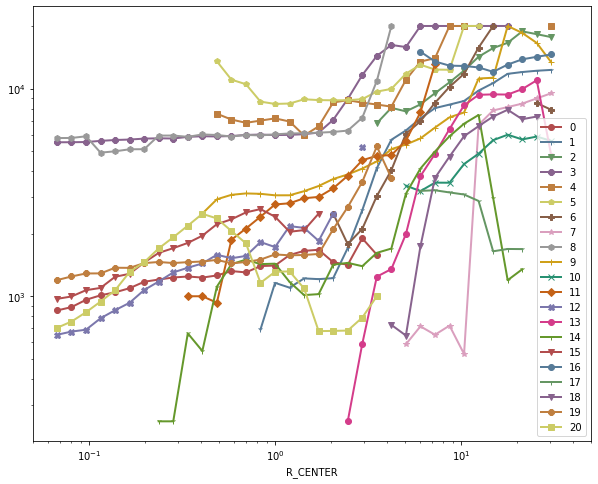

In [1064]:
mks = ['o','1','v','8','s','p','P','*','h','+','x','D','X','o','1','v']
mks = [*mks,*mks]
for c in cols:
    ax = df1[co.CPer][c].plot(
            color = FLP.COLORS[c],
        marker=mks[c],
    #               legend=False,
                  logy=True,
                linewidth=2,
                  logx=True,
                  figsize=(10,8),
        label=c
                 )
ax.set_xlim(.05,50)
ax.legend()

In [1065]:
ax.figure.savefig('/tmp/alt.pdf')

In [1027]:
res = dsZ1[co.CPer].groupby(co.ClusFlag).sum()
res = 100*res /res.sum()
res = res.to_dataframe()

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/groupby.py:639: FutureWarning: Default reduction dimension will be changed to the grouped dimension in a future version of xarray. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  skipna=skipna, allow_lazy=True, **kwargs)


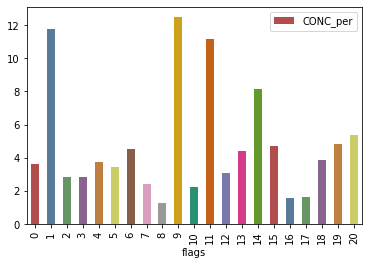

In [1029]:
res.reset_index().plot.bar(x=co.ClusFlag,y=co.CPer,color = FLP.COLORS)

In [1039]:
res.T[[1,9,11,14]].T.sum()

CONC_per    43.558643
dtype: float32

In [973]:
hour = dsZ1[co.RL].to_dataframe()
hour['hour'] = (hour.index + pd.Timedelta(-4,'hour')).hour
hour = hour['hour'].to_xarray()
dsZ1 = dsZ1.assign_coords(**{'hours':hour})

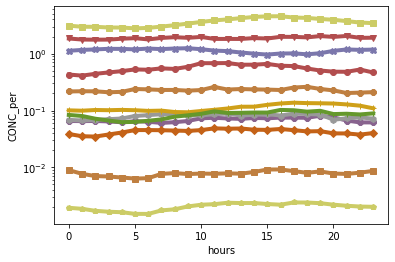

In [1017]:
for i in range(nc):
    bo = (dsZ1[co.ClusFlag]==i)
    res = dsZ1[co.CPer].where(bo).sel(
        **{co.R_CENTER:slice(0,.5),co.ZM:slice(0,100000)}
    ).sum([co.TH_CENTER,co.R_CENTER,co.ZM]).groupby('hours').median()
    ax = res.plot(color=FLP.COLORS[i],linewidth=4,marker=mks[i])
    ax = ax[0]
    ax = ax.axes
ax.set_yscale('log')

In [1040]:
path_bc = '/Users/diego/JUP/co_bc/data/horiba_chc_corrected_diego.csv'

In [1041]:
bc,CO,h  = 'abs670','CO_ppbv','hour'
lh = 'Local Time'
dt = 'date'
df = pd.read_csv(path_bc)
df[lh]=np.mod(df[h]-4,24)

In [1042]:
df[dt] = pd.to_datetime(df[dt])
df = df.set_index(dt)

In [1043]:
desc = df.groupby(lh)[bc].describe()

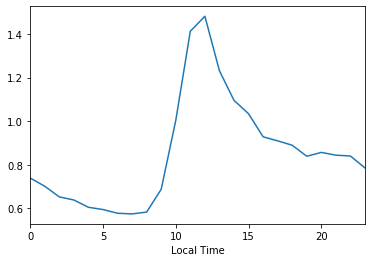

In [1044]:
desc['50%'].plot()

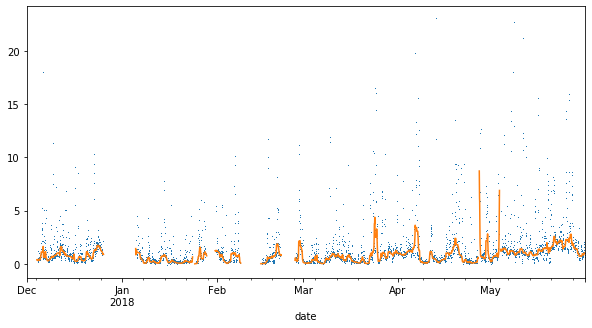

In [1045]:
dd = df[bc]['2017-12':'2018-05']

dd.plot(
    marker=',',linewidth=0,
    figsize=(10,5)
)
std=24
res = dd.rolling(std,min_periods=int(std/4),center=True).median()
ax=res.plot()
# ax.set_ylim(.1,12)
# ax.set_yscale('log')

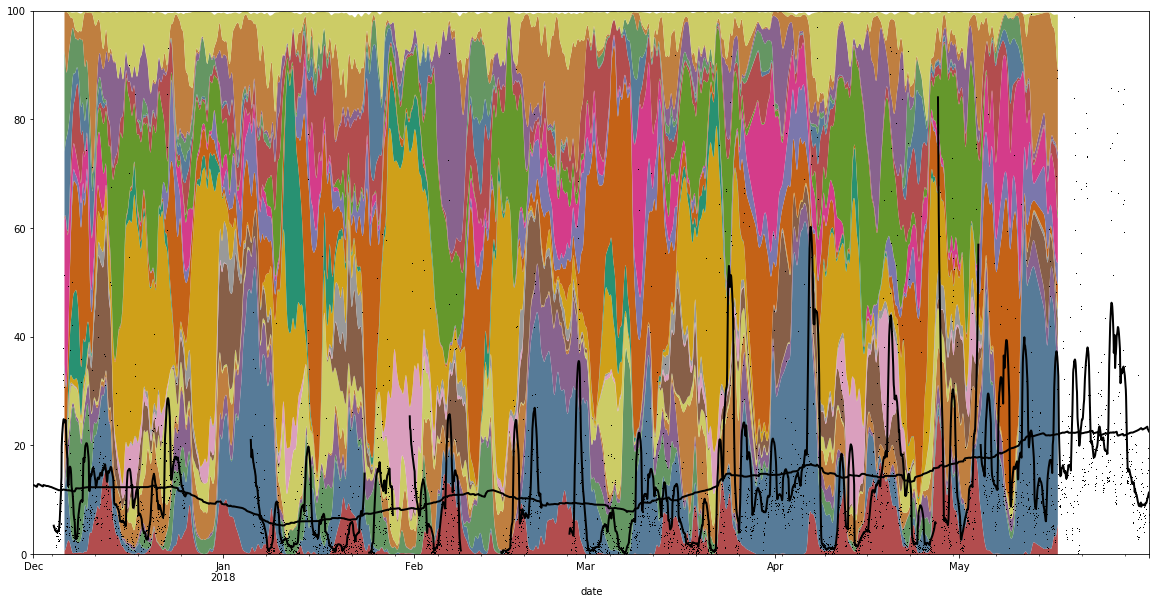

In [1046]:
axs = df2.plot.area(
    subplots=False,
    layout=(int(np.ceil(nc/3)), 3),color = FLP.COLORS,
    ylim = (0,100),grid=True,figsize=(20,10),linewidth=0,
    legend=False
              )

dd = df[bc]['2017-12':'2018-05']*10

dd.plot(
    marker=',',linewidth=0,
    figsize=(10,5),
    color='k'
)
std=24
resI = res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
ax=res.plot(figsize=(20,10),color='k',linewidth=2)
# ax.set_ylim(.1,8)
# ax.set_yscale('log')
std=24*30
res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
ax=res.plot(figsize=(20,10),color='k',linewidth=2)
# ax.set_ylim(.1,8)

In [1047]:
df2.head()

flags,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
releases,,,,,,,,,,,,,,,,,,,,,
2017-12-06 00:00:00,0.707857,11.028888,0.663341,1.574347,0.003185,0.211691,0.200924,0.000089,0.172315,0.315355,...,18.721502,1.257659,26.563107,0.049028,0.538139,12.072533,18.425846,0.003612,7.086277,0.239587
2017-12-06 01:00:00,0.763443,11.422018,0.643527,1.694550,0.003165,0.202774,0.234895,0.000161,0.217352,0.293642,...,17.585632,1.203361,27.362309,0.045951,0.487157,12.258152,17.687378,0.005014,7.505631,0.218183
2017-12-06 02:00:00,0.839689,11.852537,0.637966,1.844306,0.003250,0.199224,0.280951,0.000294,0.276872,0.270650,...,16.241253,1.132297,28.214409,0.042688,0.429895,12.522763,16.800739,0.006966,8.036245,0.194255
2017-12-06 03:00:00,0.938765,12.270808,0.663002,2.018394,0.003525,0.207667,0.339291,0.000528,0.351142,0.250240,...,14.766472,1.045531,29.011213,0.039802,0.371749,12.879841,15.817171,0.009544,8.653897,0.170232
2017-12-06 04:00:00,1.061315,12.618526,0.739574,2.207890,0.004091,0.236792,0.408405,0.000921,0.439090,0.237385,...,13.261915,0.946363,29.632080,0.038023,0.319167,13.336612,14.808998,0.012794,9.312475,0.149067


In [1048]:
cols = df2.columns

In [1130]:
resI.index.name = co.RL
res2 = pd.merge(resI,df2,left_index=True,right_index=True)
res2=res2.dropna()

In [1131]:
import scipy.optimize.nnls as nnls

In [1154]:
bcl='eBC [µg/m³]'
res2[bcl]=res2[bc]/6.6

In [1155]:
A = res2[cols]
Av = A.values

In [1156]:
b = res2[bcl]
bv = b.values

In [1157]:
# res = nnls(A,b)
res = nnls(Av[:],bv[:])

In [1158]:
r0 =res[0]

In [1159]:
AA = res2.copy()
c=np.dot(A,np.array(r0))
cc = 'reconstructed eBC signal'
AA[cc]=c

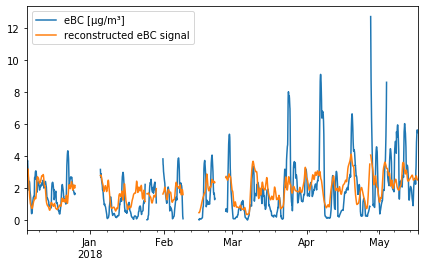

In [1160]:
ax = AA[[bcl,cc]].resample('H').mean().plot()
ax.figure.tight_layout()
ax.set_xlabel('')
ax.figure.savefig('/tmp/abs_mea_cal.pdf')

In [1163]:
r1 = pd.Series(res[0],index=cols)
r1 = r1/r1.sum()

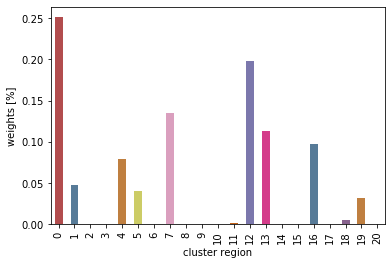

In [1164]:

ax = r1.plot.bar(color = FLP.COLORS)
ax.set_xlabel('cluster region')
ax.set_ylabel('weights [%]')
ax.figure.savefig('/tmp/meas_bar_abs.pdf')

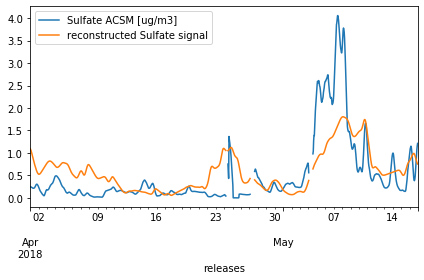

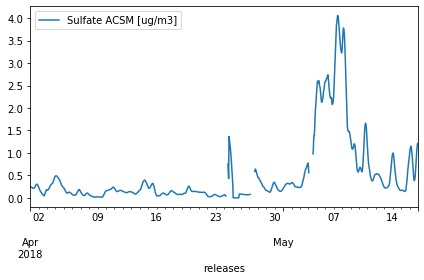

In [1127]:
r0 =res[0]
AA = res2.copy()
c=np.dot(A,np.array(r0))
lab = 'reconstructed Sulfate signal'
AA[lab]=c
l1 = 'Sulfate ACSM [ug/m3]'
AA[l1]=AA[c1]
# AA=AA.rename(mapper=str,columns={c1:l1})
ax = AA[[l1,lab]].resample('H').mean().plot()
ax.figure.tight_layout()
ax.figure.savefig('/tmp/abs_mea_cal.pdf')

r0 =res[0]
AA = res2.copy()
c=np.dot(A,np.array(r0))
lab = 'reconstructed Sulfate signal'
AA[lab]=c
l1 = 'Sulfate ACSM [ug/m3]'
AA[l1]=AA[c1]
# AA=AA.rename(mapper=str,columns={c1:l1})
ax = AA[[l1]].resample('H').mean().plot()
ax.figure.tight_layout()
ax.figure.savefig('/tmp/abs_mea_cal1.pdf')

In [996]:
r1.index.name=co.ClusFlag

In [997]:
path = '/Volumes/mbProD/Downloads/CHC_QACSM.xlsx'

In [998]:
acsm = pd.read_excel(path)
acsm = acsm.set_index('Date UTC')
acsm = acsm[1:]
acsm = acsm['2018-04-01':]
acsm = acsm.resample('1H').median()
acsm = acsm.rolling(
    12,min_periods=1,center=True,win_type='gaussian'
).mean(std=4)

# acsm = acsm.rolling(
#     24,min_periods=1,center=True
# ).median()




In [1068]:
acsm.index.name = co.RL

In [1093]:
resI.index.name = co.RL
res2 = pd.merge(acsm,df2,left_index=True,right_index=True)
res2=res2.dropna()

In [1094]:
acsm.columns

Index(['Organics', 'Sulfate', 'Nitrate', 'Ammonium', 'Chloride'], dtype='object')

In [1095]:
A = res2[cols]
Av = A.values

In [1096]:
# c1 = 'Nitrate'
c1 = 'Sulfate'
b = res2[c1]
# bo = b<4
# b = b[bo]
# A = res2[cols][bo]
# Av = A.values
bv = b.values

In [1097]:
# res = nnls(A,b)
res = nnls(Av[:],bv[:])

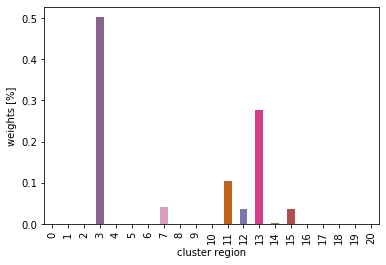

In [1114]:
r1 = pd.Series(res[0],index=cols)
r1 = r1/r1.sum()
ax = r1.plot.bar(color = FLP.COLORS)
ax.set_xlabel('cluster region')
ax.set_ylabel('weights [%]')

ax.figure.savefig('/tmp/sulf_weights.pdf')

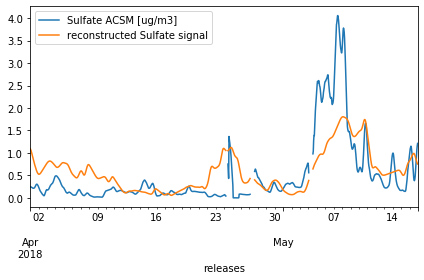

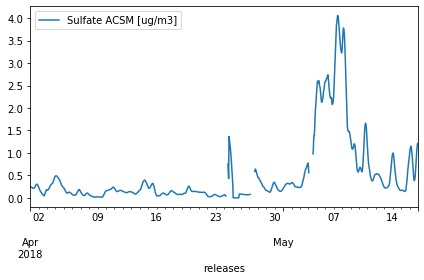

In [1126]:
r0 =res[0]
AA = res2.copy()
c=np.dot(A,np.array(r0))
lab = 'reconstructed Sulfate signal'
AA[lab]=c
l1 = 'Sulfate ACSM [ug/m3]'
AA[l1]=AA[c1]
# AA=AA.rename(mapper=str,columns={c1:l1})
ax = AA[[l1,lab]].resample('H').mean().plot()
ax.figure.tight_layout()
ax.figure.savefig('/tmp/abs_mea_cal.pdf')

r0 =res[0]
AA = res2.copy()
c=np.dot(A,np.array(r0))
lab = 'reconstructed Sulfate signal'
AA[lab]=c
l1 = 'Sulfate ACSM [ug/m3]'
AA[l1]=AA[c1]
# AA=AA.rename(mapper=str,columns={c1:l1})
ax = AA[[l1]].resample('H').mean().plot()
ax.figure.tight_layout()
ax.figure.savefig('/tmp/abs_mea_cal1.pdf')

array(['2018-04-01 00:00:00', '2018-04-01 01:00:00',
       '2018-04-01 02:00:00', ..., '2018-05-16 21:00:00',
       '2018-05-16 22:00:00', '2018-05-16 23:00:00'], dtype=object)

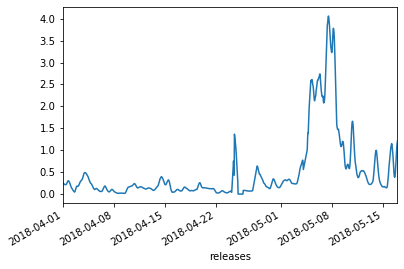

In [802]:
res2[c1].plot()